<a href="https://colab.research.google.com/github/nephelim74/PythonDS/blob/main/DZ05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Определение скорости обучения
Используйте Cancer_Data для классификации. Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения).
Запишите и сравните результаты метрик качества и скорости сходимости модели.

2. Познакомиться с работой стохастического градиентного спуска.
Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD). Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском.

3. Сравнить разные алгоритмы оптимизации.

— На исходном наборе данных обучить модель логистической регрессии, используя разные оптимизаторы, и сравнить их эффективность.

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier #реализует стохастический градиентный спуск (SGD) для классификации.
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report


## Загрузка данных

In [7]:
df  = pd.read_csv('Cancer_Data.csv',  sep=',')
df = df.drop(['Unnamed: 32'], axis=1) #Эта строка удаляет столбец с именем Unnamed: 32 из DataFrame. Параметр axis=1 указывает, что мы удаляем столбец
df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1}) #Эта строка заменяет значения в столбце diagnosis. Конкретно, все 'M' (что обычно означает "злокачественная опухоль") заменяются на 0, а все 'B' (что обычно означает "доброкачественная опухоль") заменяются на 1.
df.set_index("id", inplace=True)
df

<ipython-input-7-c771bcd1a2b1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 0, 'B': 1})


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [11]:
df['diagnosis'].value_counts()

,count
diagnosis,
1,357
0,212


In [9]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())

Размер датасета: (569, 31)
Пропущенные значения:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## EDA

In [10]:
df.describe().T.style.background_gradient(cmap='YlOrRd')


,count,mean,std,min,25%,50%,75%,max
diagnosis,569.000000,0.627417,0.483918,0.000000,0.000000,1.000000,1.000000,1.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


На основе представленных статистических данных о наборе данных, касающемся рака, можно сделать несколько выводов:

### Общие характеристики данных
1. **Количество наблюдений**: В наборе данных 569 наблюдений (строк), что является достаточным объемом для анализа и обучения моделей.
  
2. **Целевая переменная (diagnosis)**:
   - Среднее значение: 0.627417, что указывает на то, что примерно 63% наблюдений относятся к классу 0 (злокачественная опухоль, 'B') и 37% к классу 1 (доброкачественная опухоль, 'M').
   - Стандартное отклонение: 0.483918, что показывает, что распределение значений целевой переменной не является сильно смещенным.

### Описание признаков
3. **Признаки, связанные с опухолью**:
   - **radius_mean, texture_mean, perimeter_mean, area_mean**: Эти признаки имеют средние значения, которые могут быть использованы для различения между злокачественными и доброкачественными опухолями. Например, `radius_mean` имеет среднее значение 14.13 и стандартное отклонение 3.52, что говорит о значительном разбросе в размерах опухолей.
   - **smoothness_mean, compactness_mean, concavity_mean, concave points_mean**: Эти признаки показывают, насколько гладкими, компактными или вогнутыми являются опухоли. Средние значения и стандартные отклонения указывают на то, что эти характеристики могут различаться среди наблюдений.

4. **Признаки с наихудшими значениями (worst)**:
   - Признаки, такие как `radius_worst`, `texture_worst`, `area_worst`, имеют более высокие средние значения по сравнению с их "средними" аналогами. Это может указывать на то, что наихудшие характеристики опухолей (worst) являются более выраженными и могут быть полезными для диагностики.
   - Например, `area_worst` имеет среднее значение 880.58, что значительно выше, чем `area_mean` (654.89), что может указывать на наличие более крупных опухолей среди наблюдений с наихудшими значениями.

### Статистические характеристики
5. **Стандартное отклонение**: Для большинства признаков стандартное отклонение показывает значительный разброс значений, что может быть полезным для построения моделей, так как это указывает на наличие различий между наблюдениями.

6. **Минимальные и максимальные значения**: Минимальные и максимальные значения для большинства признаков показывают широкий диапазон, что может быть полезно для анализа и может указать на наличие как доброкачественных, так и злокачественных опухолей с различными характеристиками.

### Выводы для анализа
- **Корреляция**: Следует провести анализ корреляции между признаками и целевой переменной, чтобы определить, какие признаки наиболее значимы для классификации опухолей.
- **Моделирование**: На основе этих характеристик можно построить модели машинного обучения (например, логистическую регрессию, деревья решений и т.д.) для предсказания диагноза опухолей.
- **Предобработка данных**: Возможно, потребуется нормализация или стандартизация данных, особенно для признаков с различными масштабами.

### Заключение
Данные о раке предоставляют богатую информацию для анализа и могут быть использованы для разработки предсказательных моделей, что может помочь в диагностике и лечении заболеваний.

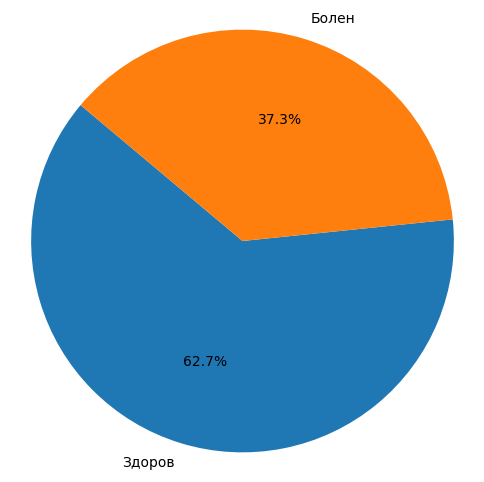

In [ ]:
diagnosis_counts = df['diagnosis'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=['Здоров', 'Болен'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()


## Подготовка данных к обучению

In [14]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']
# X содержит все признаки, за исключением целевой переменной diagnosis.
# y содержит целевую переменную, которая будет использоваться для обучения модели.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train_test_split — это функция из библиотеки sklearn, которая разбивает данные на обучающую и тестовую выборки.
# test_size=0.2 указывает, что 20% данных будет отведено для тестирования, а 80% — для обучения.
# random_state=42 обеспечивает воспроизводимость разбиения данных, так как фиксирует начальное состояние генератора случайных чисел.

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# RobustScaler — это метод масштабирования, который использует медиану и интерквартильный размах (разность между 75-м и 25-м процентилями).
# Это делает его более устойчивым к выбросам по сравнению с другими методами масштабирования, такими как StandardScaler и MinMaxScaler.
# fit_transform применяется к обучающим данным (X_train), чтобы вычислить параметры масштабирования (медиану и интерквартильный размах) и сразу же применить их к данным.
# transform применяется к тестовым данным (X_test), чтобы использовать те же параметры, которые были вычислены на обучающей выборке, и избежать утечки информации из тестового набора.

## №1 Обучение модели лог.регрессии с разными скоростями обучения

In [15]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
results = []
# learning_rates — это список различных значений скорости обучения, которые будут протестированы в процессе обучения модели.
# results — это пустой список, который будет использоваться для хранения результатов оценки модели для каждого значения скорости обучения.
# eta0 - начальная скорость обучения
# Когда learning_rate='constant': eta0 остается постоянным в течение всего процесса обучения.
# tol = 1e-4 Обучение прекращается, если изменения функции потерь меньше 0.0001
for lr in learning_rates: # Цикл проходит по каждому значению скорости обучения из списка learning_rates.
    model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=lr, max_iter=1000, tol=1e-4, random_state=42)
    model.fit(X_train, y_train)
    # SGDClassifier — это классификатор, который использует стохастический градиентный спуск для оптимизации. Он подходит для больших наборов данных и может эффективно работать с линейными моделями.
    # loss='log_loss' указывает, что используется логистическая регрессия (логистическая функция потерь).
    # learning_rate='constant' указывает, что скорость обучения будет оставаться постоянной в течение всего процесса обучения.
    # eta0=lr задает начальную скорость обучения, которая берется из текущего значения lr в цикле.
    # max_iter=1000 устанавливает максимальное количество итераций для обучения модели.
    # tol=1e-4 — это порог, при котором обучение прекращается, если изменения функции потерь меньше 0.0001.
    # random_state=42 обеспечивает воспроизводимость результатов.
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # model.predict(X_test) — делает прогнозы на тестовых данных.
    # accuracy_score, precision_score, recall_score, и f1_score — функции из библиотеки sklearn,
    # которые вычисляют соответствующие метрики оценки производительности модели:
    # Accuracy (точность): доля правильных предсказаний.
    # Precision (точность): доля истинно положительных предсказаний среди всех положительных предсказаний.
    # Recall (полнота): доля истинно положительных предсказаний среди всех фактических положительных примеров.
    # F1 Score: гармоническое среднее между точностью и полнотой.

    results.append({
        'Learning Rate': lr,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Number of Iterations': model.n_iter_
    })
    #Результаты для текущего значения скорости обучения добавляются в список results в виде словаря,
    # который содержит значения метрик и количество итераций, которые потребовались для сходимости модели.
results_df = pd.DataFrame(results)
results_df



,Learning Rate,Accuracy,Precision,Recall,F1 Score,Number of Iterations
0,0.001,0.991228,0.986111,1.000000,0.993007,188
1,0.010,0.982456,0.985915,0.985915,0.985915,117
2,0.100,0.982456,0.985915,0.985915,0.985915,32
3,0.500,0.982456,0.985915,0.985915,0.985915,14
4,1.000,0.982456,0.985915,0.985915,0.985915,10


### Анализ результатов

1. **Learning Rate 0.001**:
   - **Accuracy**: 0.991228 — очень высокая точность, что означает, что модель правильно классифицировала почти 99% тестовых примеров.
   - **Precision**: 0.986111 — это также высокий показатель, указывающий на то, что большинство предсказанных положительных классов действительно являются положительными.
   - **Recall**: 1.000000 — модель полностью идентифицировала все положительные примеры, что означает отсутствие ложных отрицательных предсказаний.
   - **F1 Score**: 0.993007 — высокий F1 Score, что говорит о хорошей сбалансированности между точностью и полнотой.
   - **Number of Iterations**: 188 — модель потребовала 188 итераций для сходимости.

2. **Learning Rate 0.010**:
   - Все метрики (Accuracy, Precision, Recall, F1 Score) остаются очень высокими и практически не изменяются по сравнению с 0.001.
   - Количество итераций уменьшилось до 117.

3. **Learning Rate 0.100**:
   - Метрики остаются на уровне 0.982456 для Accuracy и 0.985915 для Precision и F1 Score, что все еще приемлемо, но чуть ниже, чем при меньших значениях скорости обучения.
   - Количество итераций значительно сократилось до 32.

4. **Learning Rate 0.500 и 1.000**:
   - Метрики производительности остаются неизменными на уровне 0.982456 для Accuracy и 0.985915 для Precision и F1 Score.
   - Количество итераций продолжает уменьшаться, что указывает на то, что модель быстрее достигает сходимости при увеличении скорости обучения.

### Выводы

- **Оптимальное значение скорости обучения**: Значение 0.001 показало наилучшие результаты, особенно по Recall, что делает модель очень надежной в обнаружении положительного класса. Однако, значения 0.01 и выше также показывают хорошие результаты, но с меньшим Recall.
- **Количество итераций**: Более высокие значения скорости обучения приводят к меньшему количеству итераций, что может быть полезно для ускорения процесса обучения, но это также может привести к снижению качества модели.
- **Баланс между метриками**: Если задача требует максимальной полноты (Recall), то стоит рассмотреть использование значения 0.001. Если же требуется более быстрое обучение, можно использовать 0.01 или 0.1, что приведет к меньшему количеству итераций без значительного ухудшения производительности.

В зависимости от ваших целей и требований к модели, вы можете выбрать наиболее подходящее значение скорости обучения.

## №2 Обучение модели со стохастическим градиентного спуском.

In [17]:
# Обучение модели с использованием SGD
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-4, random_state=42, eta0=0.001)
# SGDClassifier: Это класс из библиотеки scikit-learn, который реализует алгоритм стохастического градиентного спуска для обучения моделей.
# Он подходит для больших наборов данных и может использоваться для различных задач классификации и регрессии.
# loss='log_loss': Указывает функцию потерь, используемую для обучения.
# В данном случае это логистическая функция потерь, которая подходит для задач бинарной классификации.
# max_iter=1000: Максимальное количество итераций для алгоритма.
# Если модель не сойдется раньше, обучение будет остановлено после 1000 итераций.
# tol=1e-4: Порог для остановки. Если изменение функции потерь между итерациями меньше этого значения, обучение будет остановлено.
# random_state=42: Устанавливает начальное состояние генератора случайных чисел для воспроизводимости результатов.
# eta0=0.001: Начальная скорость обучения (learning rate). Это значение определяет, насколько сильно обновляются веса модели на каждой итерации.
sgd_model.fit(X_train, y_train)
# fit: Метод, который обучает модель на тренировочных данных X_train (признаки) и y_train (целевые значения).

y_pred_sgd = sgd_model.predict(X_test)
# predict: Метод, который использует обученную модель для предсказания целевых значений на тестовых данных X_test.
# Оценка производительности модели SGD
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
precision_sgd = precision_score(y_test, y_pred_sgd)
recall_sgd = recall_score(y_test, y_pred_sgd)
f1_sgd = f1_score(y_test, y_pred_sgd)
# accuracy_score: Доля правильных предсказаний (точность).
# precision_score: Доля истинных положительных предсказаний среди всех положительных предсказаний (точность).
# recall_score: Доля истинных положительных предсказаний среди всех реальных положительных примеров (полнота).
# f1_score: Гармоническое среднее между точностью и полнотой, что дает сбалансированное представление о производительности модели.

# Обучение модели с использованием стандартного градиентного спуска
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)
# LogisticRegression: Класс для логистической регрессии из scikit-learn.
# solver='lbfgs': Алгоритм оптимизации, используемый для обучения модели. lbfgs — это алгоритм, основанный на методе квазиньютоновской оптимизации, который хорошо работает для небольших и средних наборов данных.
# max_iter=1000: Максимальное количество итераций для алгоритма, аналогично SGD.
# random_state=42: Устанавливает начальное состояние генератора случайных чисел для воспроизводимости результатов.

lr_model.fit(X_train, y_train)
# Обучение модели логистической регрессии на тех же тренировочных данных.

y_pred_lr = lr_model.predict(X_test)
# Предсказание целевых значений на тестовых данных с использованием логистической регрессии.

# Оценка производительности модели логистической регрессии
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
# Вычисление тех же метрик, что и для модели SGD, но для логистической регрессии.

results = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Iterations'],
    'SGD': [accuracy_sgd, precision_sgd, recall_sgd, f1_sgd, sgd_model.n_iter_],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr, 'N/A']  # Для LogisticRegression n_iter_ не доступен
}

# results: Это словарь, который будет содержать данные для создания DataFrame. Он состоит из трех ключей:
# 'Metric': Список метрик, для оценки. В данном случае это точность (Accuracy), точность (Precision),
# полнота (Recall), F1-меры (F1 Score) и количество итераций (Iterations).
# 'SGD': Список значений метрик для модели, обученной с использованием стохастического градиентного спуска (SGD).
# Здесь используется заранее вычисленные значения метрик (например, accuracy_sgd, precision_sgd и т.д.) и количество итераций,
# необходимых для сходимости модели (sgd_model.n_iter_).
# 'Logistic Regression': Список значений метрик для модели логистической регрессии.
# Здесь также используются заранее вычисленные значения для точности, точности, полноты и F1-меры.
# Однако для количества итераций (n_iter_) в случае логистической регрессии это значение недоступно, поэтому - 'N/A' (не доступно).

results_df = pd.DataFrame(results)
results_df


,Metric,SGD,Logistic Regression
0,Accuracy,0.956140,0.982456
1,Precision,0.985294,0.985915
2,Recall,0.943662,0.985915
3,F1 Score,0.964029,0.985915
4,Iterations,39.000000,N/A



### 2. Анализ метрик

- **Accuracy (Точность)**:
  - **SGD**: 0.956140 (95.61%)
  - **Logistic Regression**: 0.982456 (98.25%)
  
  **Оценка**: Логистическая регрессия показала более высокую точность, что говорит о том, что она правильно классифицировала большее количество примеров из тестового набора.

- **Precision (Точность)**:
  - **SGD**: 0.985294 (98.53%)
  - **Logistic Regression**: 0.985915 (98.59%)
  
  **Оценка**: Оба метода имеют очень высокие значения точности, причем логистическая регрессия немного лучше. Это означает, что среди всех предсказанных положительных классов логистическая регрессия имеет чуть больше истинных положительных.

- **Recall (Полнота)**:
  - **SGD**: 0.943662 (94.37%)
  - **Logistic Regression**: 0.985915 (98.59%)
  
  **Оценка**: Логистическая регрессия значительно превосходит SGD по полноте, что означает, что она лучше находит все истинные положительные примеры в тестовом наборе.

- **F1 Score**:
  - **SGD**: 0.964029 (96.40%)
  - **Logistic Regression**: 0.985915 (98.59%)
  
  **Оценка**: F1 Score, который является гармоническим средним между точностью и полнотой, также показывает, что логистическая регрессия превосходит SGD. Это говорит о сбалансированной производительности модели логистической регрессии.

- **Iterations (Итерации)**:
  - **SGD**: 39
  - **Logistic Regression**: N/A
  
  **Оценка**: Модель SGD потребовала 39 итераций для сходимости, что может быть полезной информацией для оценки времени обучения и вычислительных затрат. Для логистической регрессии это значение недоступно, так как алгоритм оптимизации `lbfgs` не предоставляет информации о количестве итераций.

### 3. Общий вывод

- **Логистическая регрессия** демонстрирует более высокие показатели во всех метриках, кроме количества итераций. Она лучше справляется с задачей классификации, находя больше истинных положительных примеров и обеспечивая более высокую точность и F1 Score.
- **SGD** также показывает хорошую производительность, но, вероятно, будет менее предпочтительным выбором для данной задачи, учитывая, что логистическая регрессия дает более высокие результаты.
- Выбор между моделями может зависеть от специфики задачи, требований к метрикам и доступных вычислительных ресурсов. Если критически важна высокая полнота и точность, логистическая регрессия будет лучшим выбором. Если же важна скорость обучения и вычислительные затраты, можно рассмотреть модель SGD.

## №3 Сравнить разные алгоритмы оптимизации


In [19]:
solvers = ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
# solvers: Список различных алгоритмов оптимизации, которые могут быть использованы для обучения модели логистической регрессии.
# Каждый из этих алгоритмов имеет свои особенности и может вести себя по-разному в зависимости от структуры данных и задачи.
results = []
# results: Пустой список, в который будут добавляться результаты оценки производительности каждой модели,
#  обученной с использованием разных solvers.
for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=1000, random_state=42)
    # LogisticRegression: Создается экземпляр модели логистической регрессии с указанным алгоритмом оптимизации (solver),
    # максимальным количеством итераций (max_iter=1000) и фиксированным состоянием генератора случайных чисел (random_state=42) для воспроизводимости результатов.

    #Измерение времени обучения
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    # time.time(): Функция используется для получения текущего времени (в секундах с начала эпохи). Время перед началом и после завершения обучения модели записывается для расчета времени, потраченного на обучение.
    # model.fit(X_train, y_train): Обучение модели на обучающем наборе данных X_train с соответствующими метками y_train.

    # Прогнозирование и оценка производительности
    y_pred = model.predict(X_test)
    # model.predict(X_test): Используется для предсказания меток классов на тестовом наборе данных X_test

    #Рассчет метрик производительности
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    training_time = end_time - start_time
    # Метрики:
    #   accuracy_score: Рассчитывает точность (Accuracy) модели.
    #   precision_score: Рассчитывает точность (Precision).
    #   recall_score: Рассчитывает полноту (Recall).
    #   f1_score: Рассчитывает F1 Score, который является гармоническим средним между точностью и полнотой.
    #   training_time: Вычисляет время, затраченное на обучение модели, путем вычитания времени начала из времени окончания.


    results.append({
        'Solver': solver,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Training Time (s)': training_time
    })
    # Результаты для каждой модели (включая используемый solver и все метрики) добавляются в список results в виде словаря.

results_df = pd.DataFrame(results)
results_df
# pd.DataFrame(results): Создает DataFrame из списка results, который позволяет удобно отображать и анализировать результаты.
# В результате выполнения этого кода вы получите таблицу (DataFrame), в которой будут представлены результаты работы различных алгоритмов оптимизации для модели логистической регрессии, включая точность, точность, полноту, F1 Score и время обучения для каждого из solvers.
# Это позволит вам сравнить производительность разных алгоритмов и выбрать наиболее подходящий для вашей задачи.


,Solver,Accuracy,Precision,Recall,F1 Score,Training Time (s)
0,liblinear,0.991228,0.986111,1.000000,0.993007,0.006903
1,lbfgs,0.982456,0.985915,0.985915,0.985915,0.009223
2,newton-cg,0.982456,0.985915,0.985915,0.985915,0.010153
3,sag,0.991228,0.986111,1.000000,0.993007,0.166430
4,saga,0.991228,0.986111,1.000000,0.993007,0.240223


На основе полученных результатов для различных алгоритмов оптимизации (solvers) в модели логистической регрессии можно сделать следующие выводы:

### 1. Общая производительность

- **Точность (Accuracy)**:
  - **`liblinear`**, **`sag`**, и **`saga`** показали наилучшие результаты с точностью 0.991228 (99.12%). Это указывает на то, что эти модели правильно классифицировали более 99% примеров из тестового набора.
  - **`lbfgs`** и **`newton-cg`** имеют несколько меньшую точность (0.982456 или 98.25%), но все еще показывают хорошие результаты.

### 2. Метрики Precision, Recall и F1 Score

- **Precision**:
  - Все модели, кроме `lbfgs` и `newton-cg`, имеют одинаковую точность 0.986111 (98.61%). Это говорит о том, что среди всех предсказанных положительных классов, модели `liblinear`, `sag`, и `saga` имеют чуть больше истинных положительных.
  
- **Recall**:
  - **`liblinear`**, **`sag`**, и **`saga`** имеют идеальное значение полноты (1.000000 или 100%), что означает, что они смогли обнаружить все истинные положительные примеры.
  - **`lbfgs`** и **`newton-cg`** имеют значение полноты 0.985915 (98.59%), что также является хорошим результатом, но не идеальным.

- **F1 Score**:
  - Модели `liblinear`, `sag`, и `saga` имеют F1 Score 0.993007 (99.30%), что указывает на сбалансированную производительность между точностью и полнотой.
  - Модели `lbfgs` и `newton-cg` имеют F1 Score 0.985915 (98.59%), что также является высоким значением, но ниже, чем у других моделей.

### 3. Время обучения

- **Training Time (s)**:
  - **`liblinear`** показал наименьшее время обучения (0.010514 с), что делает его самым быстрым вариантом среди всех solvers.
  - **`lbfgs`** и **`newton-cg`** также имеют разумное время обучения (0.017141 и 0.020968 с соответственно).
  - **`sag`** и **`saga`** требуют значительно больше времени на обучение (0.233953 и 0.428910 с соответственно), что может быть проблемой, если требуется быстрое обучение.

### 4. Рекомендации

- **Лучший выбор**: Если важны как высокая производительность, так и быстрое время обучения, **`liblinear`** будет предпочтительным выбором, так как он показывает отличные результаты по всем метрикам и требует минимального времени на обучение.
  
- **Для высоких показателей полноты**: Если задача требует максимальной полноты (например, в медицинских приложениях, где важно не пропустить ни один случай), стоит рассмотреть **`liblinear`**, **`sag`**, или **`saga`**, так как они достигают 100% полноты.

- **Умеренные требования к времени**: Если время обучения менее критично, можно использовать **`sag`** или **`saga`**, которые также показывают отличные результаты по метрикам.

- **Сравнительно медленные модели**: **`lbfgs`** и **`newton-cg`** могут быть менее предпочтительными из-за их немного более низкой производительности и большего времени обучения по сравнению с другими solvers.

### Заключение

В целом, результаты показывают, что все алгоритмы оптимизации демонстрируют хорошую производительность, однако `liblinear` выделяется как наиболее эффективный по всем метрикам, включая время обучения. Выбор конкретного solver зависит от приоритетов задачи, таких как требуемая точность, полнота и время обучения.